# 공공 데이터 분석
## 시도별 실시간 평균 정보 조회

### pm10 미세먼지

#### 서울 시간별 미세먼지 평균 정보 

In [42]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnMesureLIst?serviceKey=Maa8ufPV8ii1%2Foo2nfkeluCaK82ztsmH3GFWfM8x%2FSJ389OIZKvzj6Rb%2Bh71TP2jtu%2B%2BPJbw%2F4zCK%2BffriHrRg%3D%3D&numOfRows=10&pageNo=1&itemCode=PM10&dataGubun=HOUR&searchCondition=MONTH'

req =  requests.get(url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')

data = []

items =  soup.find('items')
for item in items.find_all('item'): 
    seoul = list(item.find_all('seoul'))                                   
    time = list(item.find_all('datatime'))
    seoul_data = seoul[0].text
    time_data = time[0].text
    time_slice = time_data[11:]
    data.append([time_slice, seoul_data])
    
data

[['23:00', '60'],
 ['22:00', '58'],
 ['21:00', '64'],
 ['20:00', '71'],
 ['19:00', '69'],
 ['18:00', '62'],
 ['17:00', '57'],
 ['16:00', '55'],
 ['15:00', '58'],
 ['14:00', '58']]

In [45]:
with open('미세먼지(2).csv', 'w') as file: # data 리스트 내용 csv 파일로 저장
    file.write('dataTime,fine dust\n')
    for i in data:
        file.write('{0}, {1}\n'.format(i[0], i[1]))

In [46]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('미세먼지(2).csv', index_col = 'dataTime', encoding = 'euc-kr')
df


,fine dust
dataTime,
23:00,60
22:00,58
21:00,64
20:00,71
19:00,69
18:00,62
17:00,57
16:00,55
15:00,58


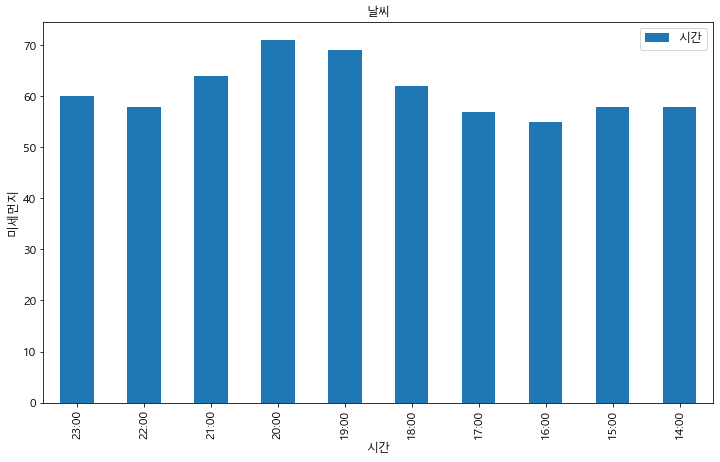

In [48]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name) # 폰트 설정

ax = df.plot(kind='bar', title='날씨', figsize =(12, 7), legend=True, fontsize=12 )
ax.set_xlabel('시간', fontsize=12) # x 축 정보 표시
ax.set_ylabel('미세먼지', fontsize=12) # y 축 정보 표시
ax.legend(['시간'], fontsize=12) # 범례 지정